<img src = 'https://fontmeme.com/permalink/230519/ef4d612dc25c04a07f0bae2ac2aa445d.png'>

<img src = 'https://cdn.pixabay.com/photo/2021/10/30/12/50/woman-6754248_960_720.jpg' >

**Introduction** <br>
This community has been created with the purpose of getting more people interested in a plant-based diet. Every day the chefs are publishing new recipes and the users can reproduce and rate them, while participating to challenges.<br> The goal of this analysis is to understand the users preferences in order to elaborate a strategy aimed at improving the community offer.

In this analysis I will be using the following dataset: https://docs.google.com/spreadsheets/d/10QO-oXIA4l8-3adIz2X5i9WLjGXYT_dt/edit?rtpof=true&sd=true#gid=2054200166 

About the data: <br>
<code>cooking_date</code> : the date on which the recipe was made by the user <br>
<code>user_uuid</code> : a number that identify the user <br>
<code>category</code> : the recipe's category <br>
<code>chef_id</code> : a number that identify the chef <br>
<code>language</code> : the user's language <br>
<code>level</code> : the recipe's level <br>
<code>challenge_id</code> : a number that identify the challenge <br>
<code>country</code> : the user's country <br>
<code>subscription_date</code> : the date on which the user become a member of the community <br>
<code>platfrom</code> : the platform used to watch the video of the recipe <br>
<code>recipe_id</code> : a number that identify the recipe <br>
<code>stars</code> : the evaluation given to the recipe from the user.

**Importing libraries and loading data**

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime

In [2]:
file = 'Food_data Final Project.xlsx'

df = pd.read_excel(file)

I will create a copy of the dataset that I will call "wine" and that I will use for my analysis, in order to keep the original dataset unmodified and correct.

In [3]:
food = df.copy()

**Data exploration**

In [4]:
food.head()

,cooking_date,user_uuid,category,chef_id,language,level,challenge_id,country,subscription_date,platform,recipe_id,stars
0,2023-02-04,82,smoothie,109,fr,intermediate,1,fr,2022-01-21,pc,1251,1
1,2023-06-22,123,ethnic,122,fr,advanced,3,fr,2021-09-19,mobile,6347,1
2,2021-10-08,186,smoothie,105,fr,basic,0,fr,2020-08-12,tv,1152,5
3,2021-03-04,202,ethnic,118,fr,basic,3,fr,2020-02-04,tv,6140,2
4,2022-01-18,216,lunch,103,en,intermediate,1,uk,2021-10-08,pc,6248,1


In [5]:
food.shape

(999, 12)

In [6]:
food.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   cooking_date       999 non-null    datetime64[ns]
 1   user_uuid          999 non-null    int64         
 2   category           999 non-null    object        
 3   chef_id            999 non-null    int64         
 4   language           999 non-null    object        
 5   level              999 non-null    object        
 6   challenge_id       999 non-null    int64         
 7   country            999 non-null    object        
 8   subscription_date  999 non-null    datetime64[ns]
 9   platform           999 non-null    object        
 10  recipe_id          999 non-null    int64         
 11  stars              999 non-null    int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 93.8+ KB


In [7]:
food.describe()

,user_uuid,chef_id,challenge_id,recipe_id,stars
count,999.000000,999.000000,999.000000,999.000000,999.000000
mean,122.226226,110.891892,1.565566,4402.144144,3.113113
std,69.593083,6.575622,1.115322,2188.155027,1.437481
min,1.000000,100.000000,0.000000,111.000000,1.000000
25%,64.000000,105.000000,1.000000,2286.000000,2.000000
50%,122.000000,111.000000,2.000000,6116.000000,3.000000
75%,183.000000,117.000000,3.000000,6287.500000,4.000000
max,245.000000,122.000000,3.000000,6399.000000,5.000000


In [8]:
food.category.unique()

array(['smoothie', 'ethnic', 'lunch', 'breakfast', 'snack', 'dinner',
       'vegan'], dtype=object)

In [9]:
food.country.unique()

array(['fr', 'uk', 'it'], dtype=object)

In [10]:
food.level.unique()

array(['intermediate', 'advanced', 'basic'], dtype=object)

In [11]:
food.platform.unique()

array(['pc', 'mobile', 'tv'], dtype=object)

In [12]:
food.user_uuid.nunique()

242

In [13]:
food.chef_id.nunique()

23

In [14]:
food.recipe_id.nunique()

593

In [15]:
food.challenge_id.unique()

array([1, 3, 0, 2])

In [16]:
sns.color_palette('inferno_r')

[(0.981173, 0.759135, 0.156863),
 (0.961293, 0.488716, 0.084289),
 (0.832299, 0.283913, 0.257383),
 (0.621685, 0.164184, 0.388781),
 (0.397674, 0.083257, 0.433183),
 (0.15585, 0.044559, 0.325338)]

In [17]:
sns.set_palette(palette = 'inferno_r', n_colors = 7)

**Data cleaning**

The data are already clean: no duplicates, no missing values. I will only add the index column to associate a unique number to each record.

In [18]:
food.reset_index(inplace = True)
food.rename(columns = {'index':'id'}, inplace = True)

**ANALYSIS**

I would like to structure the analysis in 5 different sections where each of them correspond to some characteristics of the recipes or the users.

**Table of contents:**

**1. Recipe's category
<br>2. User's country
<br>3. Recipe's level
<br>4. Chef & challenge & platform
<br>5. Time evolution**

**1. Recipes' category** <br> 

The first section will give us an overview about which categories are more popular and which ones are the most loved and I will try to find an explanation about the users' preferences.

Let's start by see which categories are the most popular.

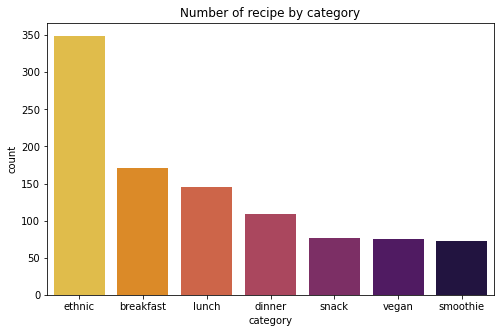

In [19]:
plt.figure(figsize=(8,5))
sns.countplot(data = food, x = 'category', order = food.category.value_counts().index)
plt.title('Number of recipe by category')
plt.show()

In [20]:
food.category.value_counts(normalize = True)

ethnic       0.349349
breakfast    0.171171
lunch        0.146146
dinner       0.109109
snack        0.077077
vegan        0.075075
smoothie     0.072072
Name: category, dtype: float64

Ethnic recipes are the most popular ones, they represent 35% of all the posted recipes. Users tend to reproduce also a lot of breakfast and lunch recipes, while the smoothies are the less popular. <br> I suppose that the users like to try new recipes and taste flavours that are not typical in their countries.

Now I want to know to which categories belong the best recipes, the ones that received 5 stars.

In [21]:
best = food[food.stars==5]

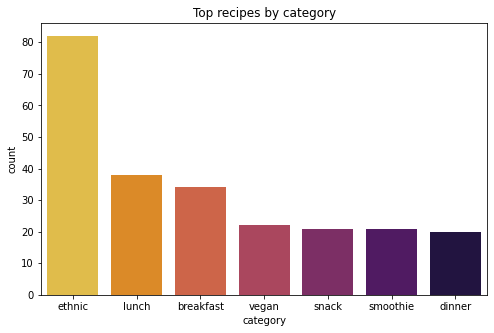

In [22]:
plt.figure(figsize=(8,5))
sns.countplot(data = best, x = 'category', order = best.category.value_counts().index)
plt.title('Top recipes by category')
plt.show()

Again, ethnic recipes are the most loved ones, in fact it is the category with the highest number of recipes that received 5 stars. We find dinner at the last place, maybe because the users tend to have different preferences when it comes to dinner.

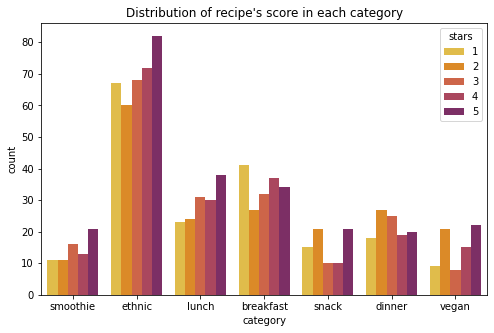

In [23]:
plt.figure(figsize=(8,5))
sns.countplot(data = food, x = 'category', hue = 'stars')
plt.title("Distribution of recipe's score in each category")
plt.show()

Usually every category got good reviews, in fact the recipes tend to receive the highest score more often than a lower number of stars. However there are some exceptions: the breakfast recipes got a high number of 1 star and dinner recipes are often evaluated with 2 stars. <br>
The ethnic category is the one that received the highest number of 5 stars, but it's also the category that the users tend to choose the most. I want then to analyse the relative data: in proportion of the total number of recipes replicated in each category, which one received more often the highest score?

In [24]:
cat = food.category.value_counts().reset_index()
cat = cat.rename(columns={'category':'total', 'index':'category'})
cat

,category,total
0,ethnic,349
1,breakfast,171
2,lunch,146
3,dinner,109
4,snack,77
5,vegan,75
6,smoothie,72


In [25]:
test = food[['category','stars']].value_counts().reset_index()
test = test.merge(cat, how = 'left', on = 'category')
test['rate'] = 100*(test[0]/test.total)

cat_rate = test.pivot('category','stars','rate')

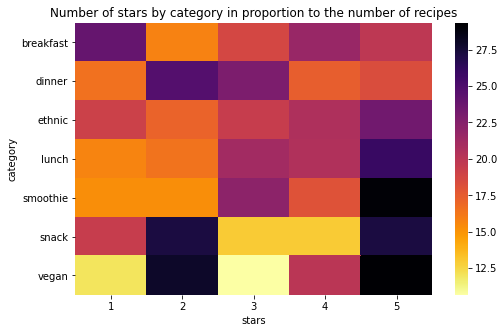

In [26]:
plt.figure(figsize=(8,5))
sns.heatmap(cat_rate, cmap = 'inferno_r')
plt.title('Number of stars by category in proportion to the number of recipes')
plt.show()

We can see now that the categories with a high pourcentage of 5 stars are vegan and smoothie recipes. However vegan recipes also got a high number of 2 stars. We confirmed that breakfast and dinner respectively got a big pourcentage of 1 and 2 stars. <br> On the other hand ethnic, lunch and smoothie recipes mostly received the higest score, these categories then have recipes that the users tend to like the most.

**2. User's country**

I wonder if the fact that breakfast, dinner and vegan recipes often are not appreciated  is due to cultural habits. <br> Let's see where the users are from:

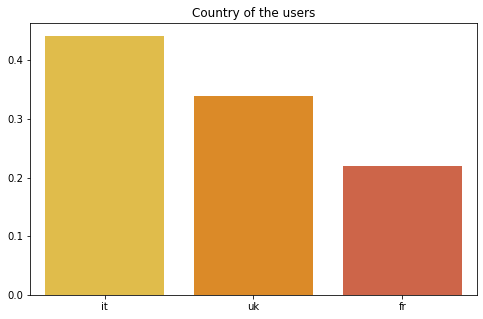

In [27]:
test = food.country.value_counts(normalize = True)
plt.figure(figsize=(8,5))
sns.barplot(x = test.index, y = test.values)
plt.title('Country of the users')
plt.show()

Only 3 nationalities are represented in the community. <br>
The majority of the users are from Italy, then we have more than 30% from the UK and the others come from France. <br>
It is true that, while the gastronomy of Italy and France are similar in many ways, as they both are mediterranean countries, UK's typical cuisine is pretty different.

What kind of food do they tend to prepare in each country?

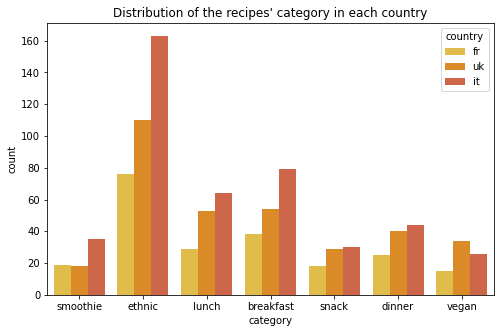

In [28]:
plt.figure(figsize=(8,5))
sns.countplot(data = food, x = 'category', hue = 'country')
plt.title("Distribution of the recipes' category in each country")
plt.show()

Again, ethnic category is the most popular and the italians are the most active users in each category, except for the vegan food. In fact vegan recipes are made mostly in the UK, english people are probably more interested in a diet without any animal products than the others.

**3. Recipes' level**

Now I want to know if the difficulty of the recipe affect the choice of the users when they have to decide the recipe to pick.

Do the users tend to reproduce easy recipes or the difficult ones?

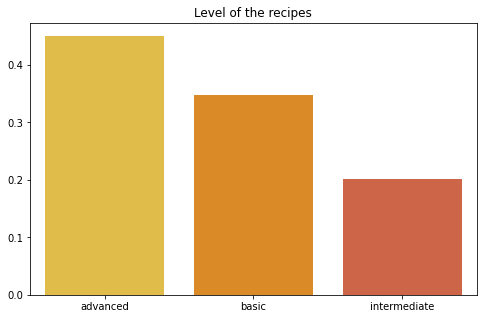

In [29]:
test = food.level.value_counts(normalize = True)
plt.figure(figsize=(8,5))
sns.barplot(x = test.index, y = test.values)
plt.title("Level of the recipes")
plt.show()

The advanced recipes are more popular, I suppose that the users like challenges.

Are there differences in the three countries?

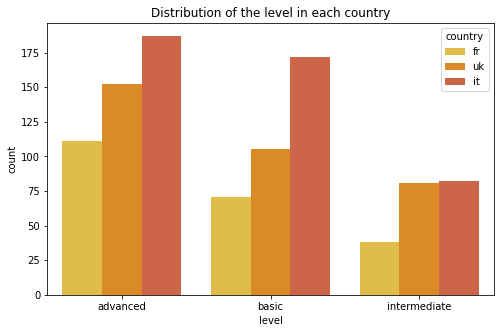

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(data = food, x = 'level', hue = 'country',
                              order = food.level.value_counts().index)
plt.title('Distribution of the level in each country')
plt.show()

Is one category more difficult than the others?

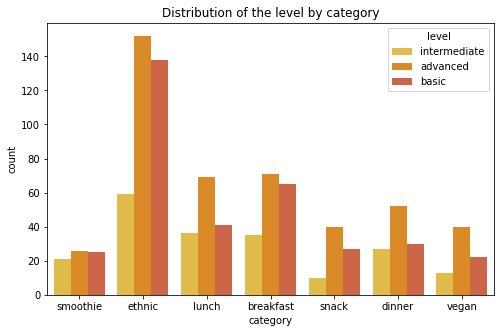

In [31]:
plt.figure(figsize=(8,5))
sns.countplot(data = food, x = 'category', hue = 'level')
plt.title('Distribution of the level by category')
plt.show()

Smoothie category has almost the same amounts of easy and difficult recipes while all the other categories have a majority of advanced recipes.

I wonder if there is a correlation between the level of a recipe and the number of stars received

In [32]:
data = [['basic', 0], ['intermediate', 1], ['advanced', 2]]
df = pd.DataFrame(data, columns = ['level', 'nlevel'])
df

,level,nlevel
0,basic,0
1,intermediate,1
2,advanced,2


In [33]:
food = food.merge(df, how = 'left', on = 'level')

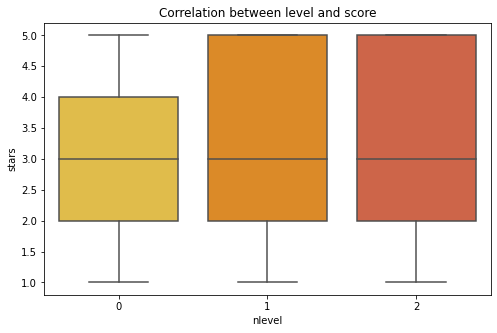

In [34]:
plt.figure(figsize=(8,5))
sns.boxplot(data = food, x ='nlevel', y = 'stars')
plt.title('Correlation between level and score')
plt.show()

The recipes of each level has received 3 stars on average, but the most difficult ones generally gained more often the highest evaluation.

**4. Chef, challenge & platform**

Who are the chefs whith the highest number of stars?

In [35]:
top10_chef = food.groupby('chef_id').stars.sum().sort_values(ascending=False).head(10)

top10_chef

chef_id
105    188
100    171
114    157
120    156
109    152
118    150
104    149
106    141
108    140
102    138
Name: stars, dtype: int64

Who are the chefs that often created difficult recipes?

In [36]:
food.groupby('chef_id').nlevel.sum().sort_values(ascending=False)

chef_id
105    81
118    72
100    60
120    53
112    51
109    49
122    49
106    49
108    47
110    47
114    47
103    47
102    46
104    45
113    45
111    44
119    42
121    41
117    40
116    38
101    37
115    37
107    34
Name: nlevel, dtype: int64

Which challenge is the most popular?

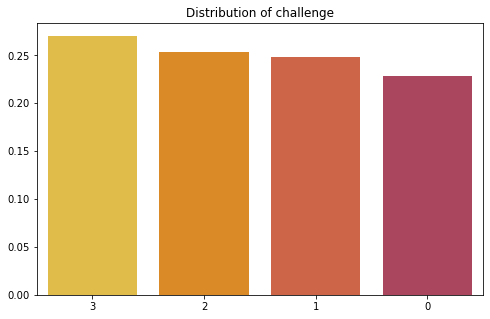

In [37]:
test = food.challenge_id.value_counts(normalize = True)
plt.figure(figsize=(8,5))
sns.barplot(x = test.index, y = test.values, order = test.index)
plt.title("Distribution of challenge")
plt.show()

Challenge number 3 is the most popular one.

Which recipes' categories belong to the different challenges?

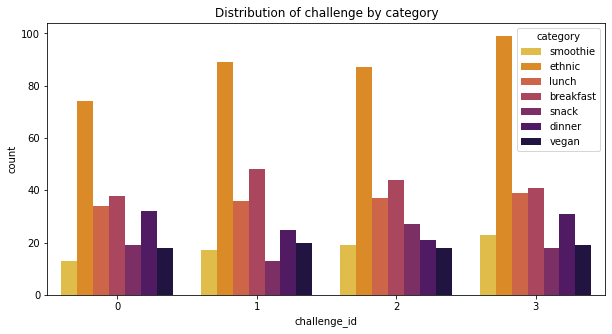

In [38]:
plt.figure(figsize = (10,5))
sns.countplot(data = food, x = 'challenge_id', hue = 'category')
plt.title("Distribution of challenge by category")
plt.show()

In each challenge there are recipes from every category, every user can then find interesting options in every challenge.

Which platform do the users prefer to use?

In [39]:
food.platform.value_counts()

tv        450
pc        309
mobile    240
Name: platform, dtype: int64

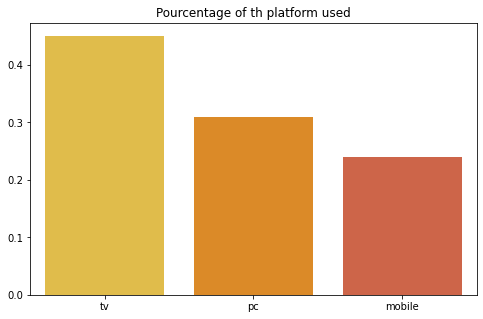

In [40]:
test = food.platform.value_counts(normalize = True)
plt.figure(figsize=(8,5))
sns.barplot(x = test.index, y = test.values)
plt.title('Pourcentage of th platform used')
plt.show()

Generally the users tend to watch the recipes on the tv, maybe because it has a bigger screen and usually there is always a tv in the kitchen.

**5. Time evolution**

In the last section I would like to analyze the evolution of the users' activity over the years.

How many members of the community are there?

In [41]:
active_user = food.groupby('user_uuid').count().sort_values(
                by = 'cooking_date', ascending = False)
active_user.id.describe()

count    242.000000
mean       4.128099
std        2.017588
min        1.000000
25%        3.000000
50%        4.000000
75%        6.000000
max       11.000000
Name: id, dtype: float64

There are 242 users in total. On average they prepare 4.1 recipes, but the most active user has prepared 11.

When did they subscribe?

In [42]:
food['year_sub'] = food['subscription_date'].dt.year

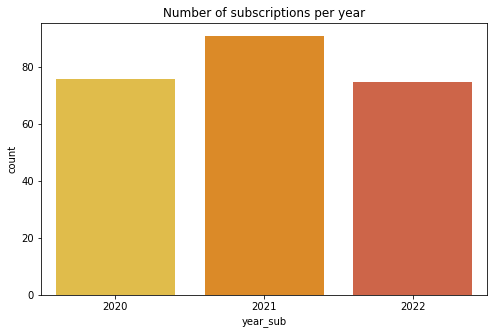

In [43]:
count = food[['user_uuid','year_sub']].value_counts().reset_index()

plt.figure(figsize=(8,5))
sns.countplot(data = count, x = 'year_sub')
plt.title('Number of subscriptions per year')
plt.show()

2021 has been characterized by the highest number of subscritpions, more than 80 new people joined the community that year.

I wonder if the activity of the users changed over the years.

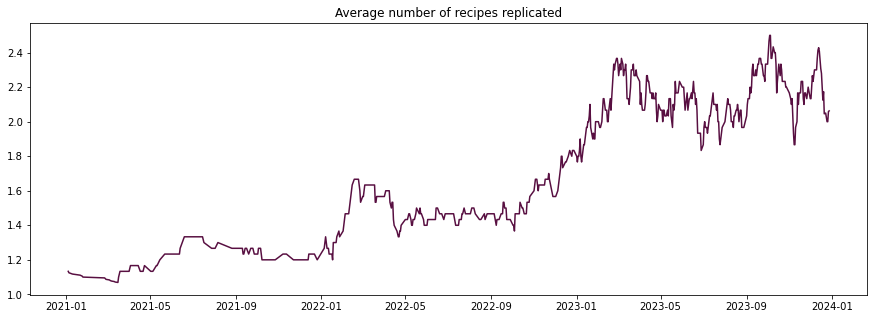

In [44]:
test = food.groupby('cooking_date').id.count().to_frame()
cook_date = test['id'].rolling(30, min_periods = 1, center = True).mean().to_frame()

plt.figure(figsize = (15,5))
plt.plot(cook_date, color = '#580F41')
plt.title('Average number of recipes replicated')
plt.show()

The activity increased over time, which is pretty positive. However the fact that the number of replicated recipes is higher now than when the community was born could also be due to the fact that each year new people joined the community.

So my question now is: are the first users still active?

In [45]:
first = food[food['year_sub']<2021]

In [46]:
first.groupby('user_uuid').count().id.describe()

count    76.000000
mean      4.328947
std       1.975774
min       1.000000
25%       3.000000
50%       4.000000
75%       6.000000
max       9.000000
Name: id, dtype: float64

76 people subscribed to the community in the first year, 2020. They have prepared 4.3 recipes on average.

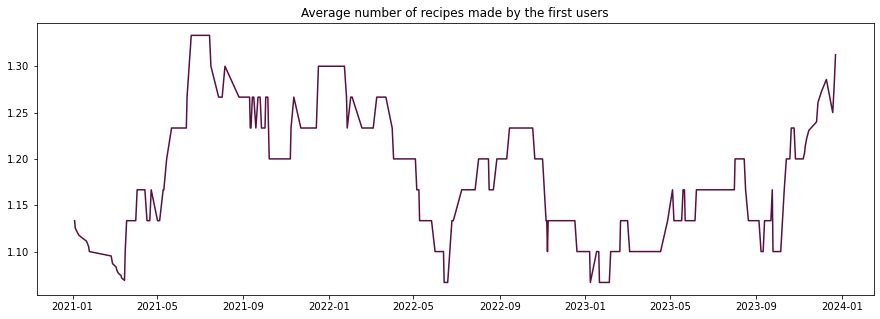

In [47]:
plt.figure(figsize = (15,5))
test = first.groupby('cooking_date').id.count().to_frame()
f_cook_date = test['id'].rolling(30, min_periods = 1, center = True).mean().to_frame()
plt.plot(f_cook_date, color = '#580F41')
plt.title('Average number of recipes made by the first users')
plt.show()

The users that entered in the community first has continued to make and post the recipes all time long, even though with some periods of a more intense activity.